In [1]:
%matplotlib inline 

from lattice_generation import GeneratedLatticeImage
from analysis_models import mixture_model_v0

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
N = 3
M = 10
N_atom = 5
N_photon = 100
std = 1
N_backg = 100
lam_backg = 1

In [3]:
lattice_image = GeneratedLatticeImage(
    N=N,
    M=M,
    N_atom=N_atom,
    N_photon=N_photon,
    std=std,
    N_backg=N_backg, 
    lam_backg=lam_backg
)

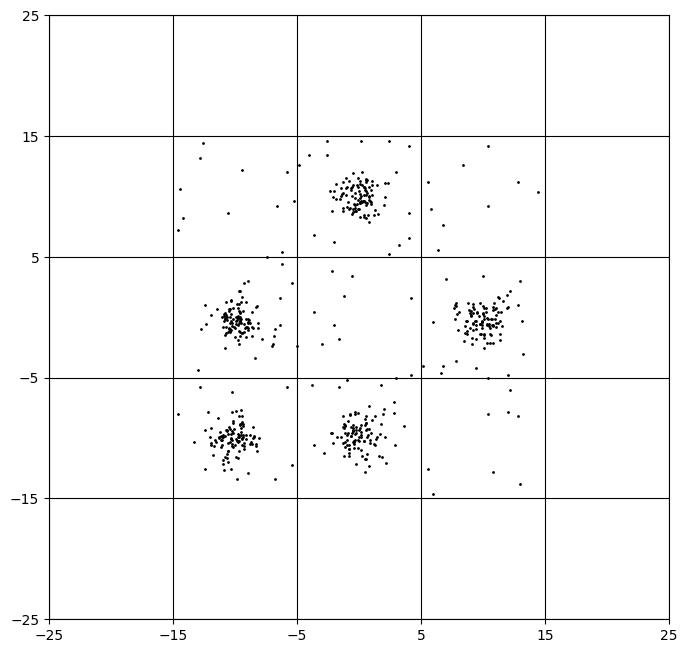

In [4]:
lattice_image.plot()

In [5]:
lattice_image.actual_lattice

array([[1., 0., 0.],
       [1., 1., 1.],
       [0., 1., 0.]])

## Analysis Part

## V1

In [5]:
from lattice_analyser import LatticeImageAnalyzer

In [6]:
# Instantiate the Analyser with the lattice_image object created above
P = LatticeImageAnalyzer(lattice_image)

In [9]:
# Choose analysis function
analysis_function = mixture_model_v0

# Run analysis
P.run_analysis(
    analysis_function=analysis_function
)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '17116' (I am process '17844')
logp = -392.42, ||grad|| = 28.703: 100%|██████████| 9/9 [00:00<00:00, 630.53it/s]
logp = -48.239, ||grad|| = 3.0198: 100%|██████████| 10/10 [00:00<00:00, 1658.81it/s]
logp = -46.055, ||grad|| = 0.0030523: 100%|██████████| 21/21 [00:00<00:00, 1812.39it/s]  
logp = -362.33, ||grad|| = 29.826: 100%|██████████| 10/10 [00:00<00:00, 1820.68it/s]
logp = -390.4, ||grad|| = 28.995: 100%|██████████| 8/8 [00:00<00:00, 1017.70it/s]
logp = -353.78, ||grad|| = 31.02: 100%|██████████| 9/9 [00:00<00:00, 2520.62it/s]
logp = -34.514, ||grad|| = 0.86514: 100%|██████████| 7/7 [00:00<00:00, 2393.42it/s]
logp = -367.04, ||grad|| = 29.856: 100%|██████████| 10/10 [00:00<00:00, 1789.84it/s]
logp = -73.684, ||grad|| = 0.0027814: 100%|██████████| 21/21 [00:00<00:00, 1681.40it/s]  


In [10]:
P.print_occupation()

[[89.3 10.2  0. ]
 [95.9 88.  92. ]
 [34.5 95.7  0. ]]


In [11]:
lattice_image.actual_lattice

array([[1., 0., 0.],
       [1., 1., 1.],
       [0., 1., 0.]])

## V2

In [23]:
pb_lower = 0
pb_upper = 1

P.setup_mixture_model(
    pb_lower=pb_lower,
    pb_upper=pb_upper
)

In [24]:
P.mixture_model

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '21098' (I am process '20656')


In [11]:
P.sample_mixture_model()

Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [Pb]
>BinaryGibbsMetropolis: [q]
Sampling chain 0, 0 divergences:   0%|          | 0/1000 [00:00<?, ?it/s]


SamplingError: Bad initial energy

In [21]:
P.mixture_model.test_point

{'Pb_interval__': array(2.22044605e-15), 'q': array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])}

In [22]:
P.mixture_model.varlogpt

Sum{acc_dtype=float64}.0